In [1]:
from sympy import init_session
from sympy import div, QQ
from sympy.parsing.latex import parse_latex
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import Markdown as md
from IPython.display import display
import pandas as pd

import numpy as np

import scipy as sc
from tabulate import tabulate
from scipy.stats import cumfreq, relfreq, stats


init_session()

a, b, c, d = symbols('a b c d', real = True)
from docparts import añadir_ejercicios, doc_ejer, escribir_preambulo, escribir_ejercicios, escribir_fin

df_ejercicios = pd.DataFrame()

fichero = 'est_ejercicios_unidimensional_2'
titulo = 'Ejercicios de Estadística Unidimensional Clases'
curso = '1BC'


x,y = symbols('x, y', real=True)

%matplotlib inline


IPython console for SymPy 1.4 (Python 3.6.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



In [4]:
def analisis_discreto(texto_ejercicio, str_datos, n_ejercicio='_'):
    texto_ejercicio = texto_ejercicio + str_datos
    enunciado_latex = [r'Realiza una tabla de frecuencias',
                   r'Realiza un diagrama de barras y un polígono de frecuencias',
                   r'Calcular los parámetros de centralización',
                   r'Calcular los parámetros de posición P70, Q1, Q3, D4',
                   r'Calcular los parámetros de dispersión'
                ]
    enunciado, solucion = [], []
    enunciado = enunciado_latex

    datos = np.loadtxt(str_datos.split())
    datos = datos.astype(int)
    #x_i, f_i, F_i, r_i  = np.unique(datos),np.bincount(datos), cumfreq(datos, numbins=len(np.unique(datos)))[0].astype(int), np.multiply(relfreq(datos, numbins=len(np.unique(datos)))[0],100)
    tabla = pd.DataFrame({'x_i':np.unique(datos), 'f_i':np.unique(datos, return_counts=True)[1], 'F_i':np.unique(datos, return_counts=True)[1].cumsum(), 'h_i':np.unique(datos, return_counts=True)[1]/len(datos), 'H_i':(np.unique(datos, return_counts=True)[1]/len(datos)).cumsum(), '%_i':np.unique(datos, return_counts=True)[1]*100/len(datos), '%A_i':(np.unique(datos, return_counts=True)[1]*100/len(datos)).cumsum()}).set_index('x_i')
    solucion.append(tabulate(tabla, headers="keys", tablefmt="latex"))

    d = np.diff(np.unique(datos)).min()
    left_of_first_bin = datos.min() - float(d)/2
    right_of_last_bin = datos.max() + float(d)/2
    plt.clf()
    plt.hist(datos, np.arange(left_of_first_bin, right_of_last_bin + d, d), rwidth=0.9, cumulative = False)
    plt.title("Diagrama "+n_ejercicio)
    plt.savefig("../img/"+n_ejercicio)

    solucion.append(r"\\ \includegraphics[width=1\columnwidth]{%s}" % n_ejercicio)

    solucion.append({"media":datos.mean(), "mediana":np.percentile(datos,50), "moda":stats.mode(datos)})
    solucion.append({"P70":np.percentile(datos,70), "Q1":np.percentile(datos,25),"Q3":np.percentile(datos,75),"D4":np.percentile(datos,40),})
    solucion.append({"rango":np.amax(datos)-np.amin(datos), "varianza": np.var(datos), "desviación típica":sqrt(np.var(datos)), "coeficiente variación": sqrt(np.var(datos))/abs(np.mean(datos))})
    display(tabla, solucion[2] , solucion[3], solucion[4])
    return  texto_ejercicio, enunciado_latex, enunciado, solucion, tabla, n_ejercicio


In [3]:
def analisis_agrupado(texto_ejercicio, str_datos, n_ejercicio='_', bin_size = 10 ):
    texto_ejercicio = texto_ejercicio + str_datos
    enunciado_latex = [r'Realiza una tabla de frecuencias',
                   r'Realiza un diagrama de barras y un polígono de frecuencias',
                   r'Calcular los parámetros de centralización',
                   r'Calcular los parámetros de posición',
                   r'Calcular los parámetros de dispersión'
                ]
    enunciado, solucion = [], []
    enunciado = enunciado_latex

    datos = np.loadtxt(str_datos.split())
    datos = datos.astype(int)
    
    display(datos)
    
    #dfrec, dagr = np.histogram(datos,range=(5*int(datos.min()/5),5*(int(datos.max()/5)+1)), bins=round((5*(int(datos.max()/5)+1)-5*int(datos.min()/5))/bin_size))
    dfrec, dagr = np.histogram(datos,range=(5*int(datos.min()/5),5*(int(datos.max()/5)+1)), bins = np.arange(5*int(datos.min()/5), 5*(int(datos.max()/5)+1)+bin_size,bin_size))

    display(dfrec, dagr, )

    display([dagr[i]+bin_size/2 for i in range(len(dagr)-1)])

    marca = [dagr[i]+bin_size/2 for i in range(len(dagr)-1)]

    datos2=[]
    [datos2.append(np.ones(j)*marca[i]) for i, j in enumerate(dfrec) ]
    #datos2.append([np.ones(j)*marca[i] for i, j in enumerate(dfrec) ])


    datos2 = np.concatenate(datos2)
    display(datos2)
    datos = datos2
    display(5*int(datos.min()/5),5*(int(datos.max()/5)+1),int((5*(int(datos.max()/5)+1)-5*int(datos.min()/5))/bin_size))

    #display(np.array(datos2))

    #x_i, f_i, F_i, r_i  = np.unique(datos),np.bincount(datos), cumfreq(datos, numbins=len(np.unique(datos)))[0].astype(int), np.multiply(relfreq(datos, numbins=len(np.unique(datos)))[0],100)
    tabla = pd.DataFrame({'x_i':np.unique(datos), 'f_i':np.unique(datos, return_counts=True)[1], 'F_i':np.unique(datos, return_counts=True)[1].cumsum(), 'r_i':np.unique(datos, return_counts=True)[1]/len(datos), 'R_i':(np.unique(datos, return_counts=True)[1]/len(datos)).cumsum(), '%_i':np.unique(datos, return_counts=True)[1]*100/len(datos), '%A_i':(np.unique(datos, return_counts=True)[1]*100/len(datos)).cumsum()}).set_index('x_i')
    solucion.append(tabulate(tabla, headers="keys", tablefmt="latex"))

    d = np.diff(np.unique(datos)).min()
    left_of_first_bin = datos.min() - float(d)/2
    right_of_last_bin = datos.max() + float(d)/2
    plt.clf()
    plt.hist(datos, np.arange(left_of_first_bin, right_of_last_bin + d, d), rwidth=0.9, cumulative = False)
    plt.title("Diagrama "+n_ejercicio)
    plt.savefig("../img/"+n_ejercicio)

    solucion.append(r"\\ \includegraphics[width=1\columnwidth]{%s}" % n_ejercicio)

    solucion.append({"media":datos.mean(), "mediana":np.percentile(datos,50), "moda":stats.mode(datos)})
    solucion.append({"Q1":np.percentile(datos,25),"Q3":np.percentile(datos,75)})
    solucion.append({"rango":np.amax(datos)-np.amin(datos), "varianza": np.var(datos), "desviación típica":sqrt(np.var(datos)), "coeficiente variación": sqrt(np.var(datos))/abs(np.mean(datos))})
    display(tabla, solucion[2] , solucion[3], solucion[4])
    return  texto_ejercicio, enunciado_latex, enunciado, solucion, tabla, n_ejercicio


,f_i,F_i,h_i,H_i,%_i,%A_i
x_i,,,,,,
0,1,1,0.029412,0.029412,2.941176,2.941176
1,2,3,0.058824,0.088235,5.882353,8.823529
2,3,6,0.088235,0.176471,8.823529,17.647059
3,2,8,0.058824,0.235294,5.882353,23.529412
4,3,11,0.088235,0.323529,8.823529,32.352941
5,6,17,0.176471,0.500000,17.647059,50.000000
6,5,22,0.147059,0.647059,14.705882,64.705882
7,6,28,0.176471,0.823529,17.647059,82.352941
8,3,31,0.088235,0.911765,8.823529,91.176471


{'media': 5.294117647058823,
 'mediana': 5.5,
 'moda': ModeResult(mode=array([5]), count=array([6]))}

{'P70': 7.0, 'Q1': 4.0, 'Q3': 7.0, 'D4': 5.0}

{'rango': 10,
 'varianza': 6.031141868512111,
 'desviación típica': 2.45583832295860,
 'coeficiente variación': 0.463880572114402}

,f_i,F_i,h_i,H_i,%_i,%A_i
x_i,,,,,,
10,2,2,0.083333,0.083333,8.333333,8.333333
11,4,6,0.166667,0.250000,16.666667,25.000000
12,3,9,0.125000,0.375000,12.500000,37.500000
13,2,11,0.083333,0.458333,8.333333,45.833333
14,3,14,0.125000,0.583333,12.500000,58.333333
15,2,16,0.083333,0.666667,8.333333,66.666667
16,4,20,0.166667,0.833333,16.666667,83.333333
17,2,22,0.083333,0.916667,8.333333,91.666667
18,2,24,0.083333,1.000000,8.333333,100.000000


{'media': 13.833333333333334,
 'mediana': 14.0,
 'moda': ModeResult(mode=array([11]), count=array([4]))}

{'P70': 16.0, 'Q1': 11.75, 'Q3': 16.0, 'D4': 13.0}

{'rango': 8,
 'varianza': 6.222222222222221,
 'desviación típica': 2.49443825784929,
 'coeficiente variación': 0.180320837916816}

,f_i,F_i,h_i,H_i,%_i,%A_i
x_i,,,,,,
157,1,1,0.033333,0.033333,3.333333,3.333333
159,1,2,0.033333,0.066667,3.333333,6.666667
161,1,3,0.033333,0.100000,3.333333,10.000000
162,2,5,0.066667,0.166667,6.666667,16.666667
163,2,7,0.066667,0.233333,6.666667,23.333333
164,1,8,0.033333,0.266667,3.333333,26.666667
166,3,11,0.100000,0.366667,10.000000,36.666667
167,3,14,0.100000,0.466667,10.000000,46.666667
168,3,17,0.100000,0.566667,10.000000,56.666667


{'media': 168.5,
 'mediana': 168.0,
 'moda': ModeResult(mode=array([166]), count=array([3]))}

{'P70': 172.0, 'Q1': 164.5, 'Q3': 172.75, 'D4': 167.0}

{'rango': 27,
 'varianza': 34.31666666666667,
 'desviación típica': 5.85804290413331,
 'coeficiente variación': 0.0347658332589514}

,f_i,F_i,h_i,H_i,%_i,%A_i
x_i,,,,,,
1,1,1,0.033333,0.033333,3.333333,3.333333
2,1,2,0.033333,0.066667,3.333333,6.666667
3,3,5,0.100000,0.166667,10.000000,16.666667
4,1,6,0.033333,0.200000,3.333333,20.000000
5,2,8,0.066667,0.266667,6.666667,26.666667
6,2,10,0.066667,0.333333,6.666667,33.333333
7,1,11,0.033333,0.366667,3.333333,36.666667
8,2,13,0.066667,0.433333,6.666667,43.333333
9,1,14,0.033333,0.466667,3.333333,46.666667


{'media': 9.366666666666667,
 'mediana': 10.0,
 'moda': ModeResult(mode=array([10]), count=array([5]))}

{'P70': 12.0, 'Q1': 5.25, 'Q3': 12.0, 'D4': 8.0}

{'rango': 19,
 'varianza': 24.232222222222227,
 'desviación típica': 4.92262351010335,
 'coeficiente variación': 0.525546993961212}

,f_i,F_i,h_i,H_i,%_i,%A_i
x_i,,,,,,
1,2,2,0.10,0.10,10.0,10.0
2,3,5,0.15,0.25,15.0,25.0
3,4,9,0.20,0.45,20.0,45.0
4,4,13,0.20,0.65,20.0,65.0
5,3,16,0.15,0.80,15.0,80.0
6,1,17,0.05,0.85,5.0,85.0
7,2,19,0.10,0.95,10.0,95.0
8,1,20,0.05,1.00,5.0,100.0


{'media': 3.95,
 'mediana': 4.0,
 'moda': ModeResult(mode=array([3]), count=array([4]))}

{'P70': 5.0, 'Q1': 2.75, 'Q3': 5.0, 'D4': 3.0}

{'rango': 7,
 'varianza': 3.747500000000001,
 'desviación típica': 1.93584606826059,
 'coeficiente variación': 0.490087612217872}

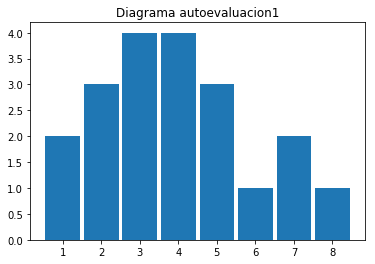

In [4]:
df_ejercicios = pd.DataFrame()

lista_problemas = [
                  ['p089e01','Las calificaciones de un grupo de 34 alumnos han sido: ',r"9 6 5 0 1 5 7 9 10 7 5 1 2 5 7 6 3 4 6 8 8 6 4 4 6 5 3 5 7 7 8 7 2 2"],
                  ['p089e03','Estos datos reflejan el tiempo, en minutos, que tardan en llegar a su centro escolar varios alumnos. ',r"10 15 11 11 14 14 11 14 17 11 17 15 10 16 12 12 13 16 13 16 18 12 18 16"],
                  ['p089e04','La altura en cm de 30 alumnos de un curso son:',r"""174 157 168 166 169 168 173 184 176 171 172 168 
                  167 162 162 163 166 166 167 167 
                  174 159 170 172 173 164 161 163 176 177"""],
                  ['p089e02', """En un grupo de personas de 1º de Bachillerato hemos preguntado por el número medio de días que
                    practican deporte al mes. Las respuestas han sido las siguientes:""",
                  """16 11 17 12 10 5 1 8 10 14 15 20 10 3 8 10 2 5 12 6 16 7 6 16 10 3 3 9 4 12"""],
                  ['autoevaluacion1',"""Se realiza una encuesta a un grupo de 20 personas acerca del número 
                  de veces que acuden al cine a lo largo de un año, obteniéndose los siguientes resultados:""",
                  r"""4 2 6 8 3 4 3 5 7 1 3 4 5 7 2 2 1 3 4 5"""]  
                                    ]
for i,p in enumerate(lista_problemas):
    texto_ejercicio, enunciado_latex, enunciado, solucion, tabla, n_ejercicio = analisis_discreto(texto_ejercicio=p[1], str_datos=p[2], n_ejercicio=p[0])
    df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=False, sol_tex=False), ignore_index=True)



,f_i,F_i,h_i,H_i,%_i,%A_i
x_i,,,,,,
0,6,6,0.30,0.30,30.0,30.0
1,6,12,0.30,0.60,30.0,60.0
2,5,17,0.25,0.85,25.0,85.0
3,3,20,0.15,1.00,15.0,100.0


{'media': 1.25,
 'mediana': 1.0,
 'moda': ModeResult(mode=array([0]), count=array([6]))}

{'P70': 2.0, 'Q1': 0.0, 'Q3': 2.0, 'D4': 1.0}

{'rango': 3,
 'varianza': 1.0875,
 'desviación típica': 1.04283268073071,
 'coeficiente variación': 0.834266144584568}

,f_i,F_i,h_i,H_i,%_i,%A_i
x_i,,,,,,
1,2,2,0.095238,0.095238,9.523810,9.523810
2,3,5,0.142857,0.238095,14.285714,23.809524
3,4,9,0.190476,0.428571,19.047619,42.857143
4,5,14,0.238095,0.666667,23.809524,66.666667
5,3,17,0.142857,0.809524,14.285714,80.952381
6,1,18,0.047619,0.857143,4.761905,85.714286
7,2,20,0.095238,0.952381,9.523810,95.238095
8,1,21,0.047619,1.000000,4.761905,100.000000


{'media': 3.9523809523809526,
 'mediana': 4.0,
 'moda': ModeResult(mode=array([4]), count=array([5]))}

{'P70': 5.0, 'Q1': 3.0, 'Q3': 5.0, 'D4': 3.0}

{'rango': 7,
 'varianza': 3.569160997732426,
 'desviación típica': 1.88922232617880,
 'coeficiente variación': 0.477996010238009}

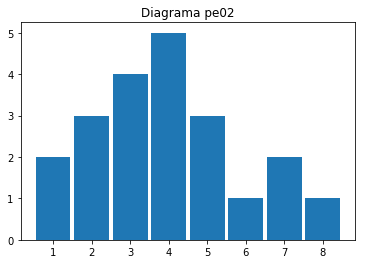

In [16]:
df_ejercicios = pd.DataFrame()

lista_problemas = [
                  ['pe01',"""Se realiza una encuesta a un grupo de 20 personas acerca del número de hermanos que tienen, obteniéndose los siguientes resultados:"""
                   ,r"0 1 2 3 3 2 0 1 1 1 2 2 1 0 0 0 0 1 2 3"],
                  ['pe02',"""Se realiza una encuesta a un grupo de 21 personas acerca del número de veces que acuden al cine a lo largo de un año, obteniéndose los siguientes resultados:"""
                   ,r"4 2 6 8 3 4 3 5 7 1 3 4 5 7 2 2 1 3 4 5 4"],
        
                                    ]
for i,p in enumerate(lista_problemas):
    texto_ejercicio, enunciado_latex, enunciado, solucion, tabla, n_ejercicio = analisis_discreto(texto_ejercicio=p[1], str_datos=p[2], n_ejercicio=p[0])
    df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=False, sol_tex=False), ignore_index=True)



array([174, 157, 168, 166, 169, 168, 173, 184, 176, 171, 172, 168, 167,
       162, 162, 163, 166, 166, 167, 167, 174, 159, 170, 172, 173, 164,
       161, 163, 176, 177])

array([ 2,  6, 10,  8,  3,  1])

array([155, 160, 165, 170, 175, 180, 185])

array([157.5, 157.5, 162.5, 162.5, 162.5, 162.5, 162.5, 162.5, 167.5,
       167.5, 167.5, 167.5, 167.5, 167.5, 167.5, 167.5, 167.5, 167.5,
       172.5, 172.5, 172.5, 172.5, 172.5, 172.5, 172.5, 172.5, 177.5,
       177.5, 177.5, 182.5])

,f_i,F_i,r_i,R_i,%_i,%A_i
x_i,,,,,,
157.5,2,2,0.066667,0.066667,6.666667,6.666667
162.5,6,8,0.200000,0.266667,20.000000,26.666667
167.5,10,18,0.333333,0.600000,33.333333,60.000000
172.5,8,26,0.266667,0.866667,26.666667,86.666667
177.5,3,29,0.100000,0.966667,10.000000,96.666667
182.5,1,30,0.033333,1.000000,3.333333,100.000000


{'media': 168.66666666666666,
 'mediana': 167.5,
 'moda': ModeResult(mode=array([167.5]), count=array([10]))}

{'Q1': 163.75, 'Q3': 172.5}

{'rango': 25.0,
 'varianza': 34.47222222222222,
 'desviación típica': 5.87130498460285,
 'coeficiente variación': 0.0348101086043647}

array([15, 76, 29, 35, 75, 31, 18, 19, 52, 23, 15, 46, 73, 23, 18, 81, 35,
       17, 19, 81, 35, 27, 15, 62, 15, 81, 44, 18, 41, 31, 63, 76, 18, 45,
       24, 27, 31, 27, 32, 32, 69, 74, 45, 15, 19, 18, 18, 31, 29, 13, 47,
       17, 18, 19, 30, 76, 82, 77, 14, 50])

array([20,  8, 10,  6,  2,  3,  7,  4])

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

array([15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 25., 25., 25., 25., 25., 25.,
       25., 25., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 45.,
       45., 45., 45., 45., 45., 55., 55., 65., 65., 65., 75., 75., 75.,
       75., 75., 75., 75., 85., 85., 85., 85.])

,f_i,F_i,r_i,R_i,%_i,%A_i
x_i,,,,,,
15.0,20,20,0.333333,0.333333,33.333333,33.333333
25.0,8,28,0.133333,0.466667,13.333333,46.666667
35.0,10,38,0.166667,0.633333,16.666667,63.333333
45.0,6,44,0.100000,0.733333,10.000000,73.333333
55.0,2,46,0.033333,0.766667,3.333333,76.666667
65.0,3,49,0.050000,0.816667,5.000000,81.666667
75.0,7,56,0.116667,0.933333,11.666667,93.333333
85.0,4,60,0.066667,1.000000,6.666667,100.000000


{'media': 38.166666666666664,
 'mediana': 35.0,
 'moda': ModeResult(mode=array([15.]), count=array([20]))}

{'Q1': 15.0, 'Q3': 55.0}

{'rango': 70.0,
 'varianza': 558.3055555555554,
 'desviación típica': 23.6284903359388,
 'coeficiente variación': 0.619087083037699}

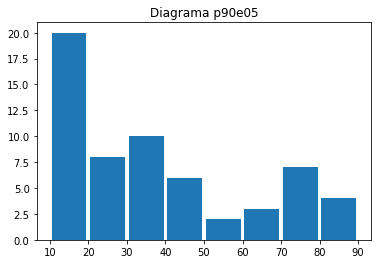

In [5]:
lista_problemas = [
                  ['p089e03b','La altura en cm de 30 alumnos de un curso son:',r"""174 157 168 166 169 168 173 184 176 171 172 168 
                  167 162 162 163 166 166 167 167 
                  174 159 170 172 173 164 161 163 176 177""", 5],
                  ['p90e05','La realización de una prueba de habilidad motora por parte de 60 niños ha dado los resultados siguientes:',
                  r"""15
76
29
35
75
31
18
19
52
23
15
46
73
23
18
81
35
17
19
81
35
27
15
62
15
81
44
18
41
31
63
76
18
45
24
27
31
27
32
32
69
74
45
15
19
18
18
31
29
13
47
17
18
19
30
76
82
77
14
50 """, 10]
                  ]
for i,p in enumerate(lista_problemas):
    texto_ejercicio, enunciado_latex, enunciado, solucion, tabla, n_ejercicio = analisis_agrupado(texto_ejercicio=p[1], str_datos=p[2], n_ejercicio=p[0], bin_size=p[3])
    df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=False, sol_tex=False), ignore_index=True)



array([15, 76, 29, 35, 75, 31, 18, 19, 52, 23, 15, 46, 73, 23, 18, 81, 35,
       17, 19, 81, 35, 27, 15, 62, 15, 81, 44, 18, 41, 31, 63, 76, 18, 45,
       24, 27, 31, 27, 32, 32, 69, 74, 45, 15, 19, 18, 18, 31, 29, 13, 47,
       17, 18, 19, 30, 76, 82, 77, 14, 50])

array([20,  8, 10,  6,  2,  3,  7,  4])

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

array([15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 25., 25., 25., 25., 25., 25.,
       25., 25., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 45.,
       45., 45., 45., 45., 45., 55., 55., 65., 65., 65., 75., 75., 75.,
       75., 75., 75., 75., 85., 85., 85., 85.])

,f_i,F_i,r_i,R_i,%_i,%A_i
x_i,,,,,,
15.0,20,20,0.333333,0.333333,33.333333,33.333333
25.0,8,28,0.133333,0.466667,13.333333,46.666667
35.0,10,38,0.166667,0.633333,16.666667,63.333333
45.0,6,44,0.100000,0.733333,10.000000,73.333333
55.0,2,46,0.033333,0.766667,3.333333,76.666667
65.0,3,49,0.050000,0.816667,5.000000,81.666667
75.0,7,56,0.116667,0.933333,11.666667,93.333333
85.0,4,60,0.066667,1.000000,6.666667,100.000000


{'media': 38.166666666666664,
 'mediana': 35.0,
 'moda': ModeResult(mode=array([15.]), count=array([20]))}

{'Q1': 15.0, 'Q3': 55.0}

{'rango': 70.0,
 'varianza': 558.3055555555554,
 'desviación típica': 23.6284903359388,
 'coeficiente variación': 0.619087083037699}

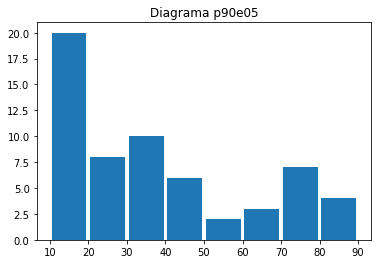

In [6]:
lista_problemas = [

                  ['p90e05','La realización de una prueba de habilidad motora por parte de 60 niños ha dado los resultados siguientes:',
                  r"""15
76
29
35
75
31
18
19
52
23
15
46
73
23
18
81
35
17
19
81
35
27
15
62
15
81
44
18
41
31
63
76
18
45
24
27
31
27
32
32
69
74
45
15
19
18
18
31
29
13
47
17
18
19
30
76
82
77
14
50 """, 10]
                  ]
for i,p in enumerate(lista_problemas):
    texto_ejercicio, enunciado_latex, enunciado, solucion, tabla, n_ejercicio = analisis_agrupado(texto_ejercicio=p[1], str_datos=p[2], n_ejercicio=p[0], bin_size=p[3])
    df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=False, sol_tex=False), ignore_index=True)



In [3]:
# Página 90 ejercicio 6

texto_ejercicio = r"""La medida del tórax de una muestra de varones se distribuye: """



n_ejercicio = 'p090e06'
enunciado_latex, enunciado, solucion = [],[],[]

datos = np.array([[79.5,85.5,4],[85.5,91.5,8],[91.5,97.5,12],[97.5,103.5,20],[103.5,109.5,9],[109.5,115.5,5],[115.5,121.5,2]])
tabla_enunciado = pd.DataFrame(list(zip([r"$"+latex(Interval.Ropen(k[0],k[1]))+"$" for k in datos[:,0:2]],datos[:,2])), columns=['Duración','Cantidad'])
tabla_enunciado_latex = tabulate(tabla_enunciado, headers="keys", tablefmt="latex").replace('\\$','$').replace('textbackslash{}','')
texto_ejercicio = texto_ejercicio + r'\\'+ tabla_enunciado_latex

display(md("**"+texto_ejercicio+"**"))

marca = (datos[:,1]+datos[:,0])/2
marca = marca.reshape(-1,1)
datos = np.concatenate((datos, marca), axis=1)[:,[0,1,3,2]]
tabla = pd.DataFrame({r'lim_inf': datos[:,0],'lim_sup': datos[:,1],
                      'x_i': datos[:,2],'f_i':datos[:,3],'F_i':datos[:,3].cumsum(),
                     'h_i': datos[:,3]/datos[:,3].sum(), 'H_i':(datos[:,3]/datos[:,3].sum()).cumsum(),
                     'x_if_i': datos[:,2]*datos[:,3], 'x^2_if_i': datos[:,2]**2*datos[:,3]})
tabla

#totales = np.array([np.nan,np.nan,np.nan,tabla.f_i.sum(),tabla.F_i.sum()])
totales = pd.DataFrame([[np.nan,np.nan,np.nan,tabla.f_i.sum(),
                         np.nan, tabla.h_i.sum(), np.nan,
                        tabla.x_if_i.sum(),tabla['x^2_if_i'].sum()]],columns=list(tabla.columns))

tabla.append(totales,ignore_index=True)

# pregunta 1
enunciado_latex.append("Haz una tabla de frecuencias")
enunciado.append("Haz una tabla de frecuencias")
solucion.append(tabulate(tabla.append(totales,ignore_index=True), headers="keys", tablefmt="latex"))

# pregunta 2

enunciado_latex.append("Calcula media, la varianza, la desviación típica y el coeficiente de variación")
enunciado.append("Calcula media, la varianza, la desviación típica y el coeficiente de variación")

media = (totales['x_if_i']/totales['f_i'])[0]
media

var = (totales['x^2_if_i']/totales['f_i']-media**2)[0]

desv_tip = sqrt(var)

{'media':media, 'varianza': var, 'desviación típica': desv_tip}
solucion.append({'media':media, 'varianza': var, 'desviación típica': desv_tip
                , 'coeficiente de variación': desv_tip/abs(media)})

    

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=False, sol_tex=False), ignore_index=True)


**La medida del tórax de una muestra de varones se distribuye: \\\begin{tabular}{rlr}
\hline
    & Duración                    &   Cantidad \\
\hline
  0 & $\left[79.5, 85.5\right)$   &          4 \\
  1 & $\left[85.5, 91.5\right)$   &          8 \\
  2 & $\left[91.5, 97.5\right)$   &         12 \\
  3 & $\left[97.5, 103.5\right)$  &         20 \\
  4 & $\left[103.5, 109.5\right)$ &          9 \\
  5 & $\left[109.5, 115.5\right)$ &          5 \\
  6 & $\left[115.5, 121.5\right)$ &          2 \\
\hline
\end{tabular}**

In [4]:
# Página 90 ejercicio 7

texto_ejercicio = r"""En una consulta médica la distribución de pacientes por su edad ha sido, en la última semana, la siguiente:"""



n_ejercicio = 'p090e07'
enunciado_latex, enunciado, solucion = [],[],[]

datos = np.array([[15,23,3],[23,31,4],[31,39,5],[39,47,8],[47,55,10],[55,63,12],[63,71,15],[71,79,12],[79,87,6]])
tabla_enunciado = pd.DataFrame(list(zip([r"$"+latex(Interval.Ropen(k[0],k[1]))+"$" for k in datos[:,0:2]],datos[:,2])), columns=['Duración','Cantidad'])
tabla_enunciado_latex = tabulate(tabla_enunciado, headers="keys", tablefmt="latex").replace('\\$','$').replace('textbackslash{}','')
texto_ejercicio = texto_ejercicio + r'\\'+ tabla_enunciado_latex

display(md("**"+texto_ejercicio+"**"))

marca = (datos[:,1]+datos[:,0])/2
marca = marca.reshape(-1,1)
datos = np.concatenate((datos, marca), axis=1)[:,[0,1,3,2]]
tabla = pd.DataFrame({r'lim_inf': datos[:,0],'lim_sup': datos[:,1],
                      'x_i': datos[:,2],'f_i':datos[:,3],'F_i':datos[:,3].cumsum(),
                     'h_i': datos[:,3]/datos[:,3].sum(), 'H_i':(datos[:,3]/datos[:,3].sum()).cumsum(),
                     'x_if_i': datos[:,2]*datos[:,3], 'x^2_if_i': datos[:,2]**2*datos[:,3]})
tabla

#totales = np.array([np.nan,np.nan,np.nan,tabla.f_i.sum(),tabla.F_i.sum()])
totales = pd.DataFrame([[np.nan,np.nan,np.nan,tabla.f_i.sum(),
                         np.nan, tabla.h_i.sum(), np.nan,
                        tabla.x_if_i.sum(),tabla['x^2_if_i'].sum()]],columns=list(tabla.columns))

tabla.append(totales,ignore_index=True)


enunciado_latex.append("Haz una tabla de frecuencias")
enunciado.append("Haz una tabla de frecuencias")
solucion.append(tabulate(tabla.append(totales,ignore_index=True), headers="keys", tablefmt="latex"))

enunciado_latex.append("Calcula media, la varianza, la desviación típica y el coeficiente de variación")
enunciado.append("Calcula media, la varianza, la desviación típica y el coeficiente de variación")

media = (totales['x_if_i']/totales['f_i'])[0]
media

var = (totales['x^2_if_i']/totales['f_i']-media**2)[0]

desv_tip = sqrt(var)

{'media':media, 'varianza': var, 'desviación típica': desv_tip}
solucion.append({'media':media, 'varianza': var, 'desviación típica': desv_tip
                , 'coeficiente de variación': desv_tip/abs(media)})

# pregunta 3

enunciado_latex.append("La edad mas frecuente de los pacientes")
enunciado.append("La edad mas frecuente de los pacientes")


fila_moda = tabla.loc[tabla.f_i==tabla.f_i.max()]
ind = fila_moda.index[0]
L = tabla.iloc[ind].lim_inf
f = tabla.iloc[ind].f_i
if ind == 0 :
    f0 = 0
else:
    f0 = tabla.iloc[ind-1].f_i
    
if ind == max(tabla.index) :
    f2 = f0
else:
    f2 = tabla.iloc[ind+1].f_i
C = tabla.iloc[ind].lim_sup - tabla.iloc[ind].lim_inf

moda = L + C*(f-f0)/((f-f0)+(f-f2))

print(moda)

solucion.append({'Intervalo modal':r"$"+latex(Interval.Ropen(fila_moda.lim_inf,fila_moda.lim_sup))+"$" ,'moda': moda})
#solucion.append(r"$"+latex(Interval.Ropen(fila_moda.lim_inf,fila_moda.lim_sup))+r"$")

# pregunta 4

enunciado_latex.append("El percentil 47")
enunciado.append("El percentil 47")

perc = 47
ind = tabla.loc[tabla.H_i<=perc/100].iloc[-1:].index[0] + 1

k = perc
N = totales.f_i[0]
L = tabla.iloc[ind].lim_inf
f = tabla.iloc[ind].f_i
if ind == 0 :
    F = 0
else:
    F = tabla.iloc[ind-1].F_i
C = tabla.iloc[ind].lim_sup - tabla.iloc[ind].lim_inf

print({'k':k, 'N': N, 'L_i': L, 'f_i': f, 'F_{i-1}':F, 'C_i':C})

percentil = L + C*(k*(N/100)-F)/f

solucion.append({r'k':k, r'N': N, r'$L_i$': L, r'$f_i$': f, r'$F_{i-1}$':F, r'$C_i$':C, 'percentil':percentil})

#pregunta 4

enunciado_latex.append("¿Qué porcentaje de pacientes tenían una edad superior a 60 años?")
enunciado.append("¿Qué porcentaje de pacientes tenían una edad superior a 60 años?")

valor = 60
ind = tabla.loc[tabla.lim_inf<=valor].iloc[-1:].index[0]

if ind == 0 :
    F = 0
else:
    F = tabla.iloc[ind-1].F_i

N = totales.f_i[0]
L = tabla.iloc[ind].lim_inf
f = tabla.iloc[ind].f_i
C = tabla.iloc[ind].lim_sup - tabla.iloc[ind].lim_inf

print({'valor':valor, 'N': N, r'$L_i$': L, r'$f_i$': f, r'$F_{i-1}$':F, r'$C_i$':C, 'Porcentaje':solve(Eq(valor,L+C*(x*N/100-F)/f))[0]})

print(solve(Eq(valor,L+C*(x*N/100-F)/f))[0])


solucion.append({'valor':valor, 'N': N, r'$L_i$': L, r'$f_i$': f, r'$F_{i-1}$':F, r'$C_i$':C, 'Porcentaje':solve(Eq(valor,L+C*(x*N/100-F)/f))[0]})


df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=False, sol_tex=False), ignore_index=True)


**En una consulta médica la distribución de pacientes por su edad ha sido, en la última semana, la siguiente:\\\begin{tabular}{rlr}
\hline
    & Duración              &   Cantidad \\
\hline
  0 & $\left[15, 23\right)$ &          3 \\
  1 & $\left[23, 31\right)$ &          4 \\
  2 & $\left[31, 39\right)$ &          5 \\
  3 & $\left[39, 47\right)$ &          8 \\
  4 & $\left[47, 55\right)$ &         10 \\
  5 & $\left[55, 63\right)$ &         12 \\
  6 & $\left[63, 71\right)$ &         15 \\
  7 & $\left[71, 79\right)$ &         12 \\
  8 & $\left[79, 87\right)$ &          6 \\
\hline
\end{tabular}**

67.0
{'k': 47, 'N': 75.0, 'L_i': 55.0, 'f_i': 12.0, 'F_{i-1}': 30.0, 'C_i': 8.0}
{'valor': 60, 'N': 75.0, '$L_i$': 55.0, '$f_i$': 12.0, '$F_{i-1}$': 30.0, '$C_i$': 8.0, 'Porcentaje': 50.0000000000000}
50.0000000000000


In [5]:
df_ejercicios

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
0,Realiza una tabla de frecuencias,Realiza una tabla de frecuencias,\begin{tabular}{rrrrrrr}\n\hline\n x\_i & ...,Se realiza una encuesta a un grupo de 20 perso...,1BC,Ejercicios de Estadística Unidimensional,p089e01,1,1,1,False,False
1,Realiza un diagrama de barras y un polígono de...,Realiza un diagrama de barras y un polígono de...,\\ \includegraphics[width=1\columnwidth]{p089e01},Se realiza una encuesta a un grupo de 20 perso...,1BC,Ejercicios de Estadística Unidimensional,p089e01,1,1,1,False,False
2,Calcular los parámetros de centralización,Calcular los parámetros de centralización,"{'media': 1.25, 'mediana': 1.0, 'moda': ([0], ...",Se realiza una encuesta a un grupo de 20 perso...,1BC,Ejercicios de Estadística Unidimensional,p089e01,1,1,1,False,False
3,"Calcular los parámetros de posición P70, Q1, Q...","Calcular los parámetros de posición P70, Q1, Q...","{'P70': 2.0, 'Q1': 0.0, 'Q3': 2.0, 'D4': 1.0}",Se realiza una encuesta a un grupo de 20 perso...,1BC,Ejercicios de Estadística Unidimensional,p089e01,1,1,1,False,False
4,Calcular los parámetros de dispersión,Calcular los parámetros de dispersión,"{'rango': 3, 'varianza': 1.0875, 'desviación t...",Se realiza una encuesta a un grupo de 20 perso...,1BC,Ejercicios de Estadística Unidimensional,p089e01,1,1,1,False,False


In [10]:
df_ejercicios.to_csv('ejercicios41.csv', index = False)

In [11]:
df_ejercicios = pd.read_csv('ejercicios41.csv', index_col= None)

In [5]:
escribir_preambulo(fichero, titulo, 'ejercicios')
for s in df_ejercicios.groupby('n_ejercicio').count().index : 
    display(md("**Ejercicio: **" + s ))
    display(df_ejercicios[df_ejercicios.n_ejercicio == s])
    escribir_ejercicios(df_ejercicios[df_ejercicios.n_ejercicio == s],fichero)

escribir_fin(fichero)

**Ejercicio: **p090e06

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
0,Haz una tabla de frecuencias,Haz una tabla de frecuencias,\begin{tabular}{rrrrrrrrrr}\n\hline\n & l...,La medida del tórax de una muestra de varones ...,1BC,Ejercicios de Estadística Unidimensional Clases,p090e06,1,1,1,False,False
1,"Calcula media, la varianza, la desviación típi...","Calcula media, la varianza, la desviación típi...","{'media': 99.0, 'varianza': 73.95000000000073,...",La medida del tórax de una muestra de varones ...,1BC,Ejercicios de Estadística Unidimensional Clases,p090e06,1,1,1,False,False


**Ejercicio: **p090e07

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
2,Haz una tabla de frecuencias,Haz una tabla de frecuencias,\begin{tabular}{rrrrrrrrrr}\n\hline\n & l...,En una consulta médica la distribución de paci...,1BC,Ejercicios de Estadística Unidimensional Clases,p090e07,1,1,1,False,False
3,"Calcula media, la varianza, la desviación típi...","Calcula media, la varianza, la desviación típi...","{'media': 57.4, 'varianza': 290.13333333333367...",En una consulta médica la distribución de paci...,1BC,Ejercicios de Estadística Unidimensional Clases,p090e07,1,1,1,False,False
4,La edad mas frecuente de los pacientes,La edad mas frecuente de los pacientes,"{'Intervalo modal': '$\left[63.0, 71.0\right)$...",En una consulta médica la distribución de paci...,1BC,Ejercicios de Estadística Unidimensional Clases,p090e07,1,1,1,False,False
5,El percentil 47,El percentil 47,"{'k': 47, 'N': 75.0, '$L_i$': 55.0, '$f_i$': 1...",En una consulta médica la distribución de paci...,1BC,Ejercicios de Estadística Unidimensional Clases,p090e07,1,1,1,False,False
6,¿Qué porcentaje de pacientes tenían una edad s...,¿Qué porcentaje de pacientes tenían una edad s...,"{'valor': 60, 'N': 75.0, '$L_i$': 55.0, '$f_i$...",En una consulta médica la distribución de paci...,1BC,Ejercicios de Estadística Unidimensional Clases,p090e07,1,1,1,False,False
